# Projeto 2
Vamos dar continuidade ao nosso projeto, agora como os dados á foram trabalhados e pré-processados no projeto 1, vamos neste projeto utilizar algoritmos para conseguir um modelo para classificar a posição de um jogador daods os seus atributos

## Passo 1: Selecionar coluna do projeto 1
Primeiramente colocamos uma função no notebook do projeto 1 para que fossem exportados os dados que fizemos um pre-processamento, para isso importamos novamente a biblioteca pandas que vamos utilizar para ler os dados da tabela e manipulá-lo no código.

In [2]:
import pandas as pd

In [3]:
df = pd.read_pickle("./project_dataset.pkl")

df.head(10)

player_positions   overall      pace  shooting   passing  dribbling  \
142             Meia  0.796296  0.723684    0.6500  0.783784   0.851351   
143         Zagueiro  0.796296  0.802632    0.3125  0.662162   0.689189   
144             Meia  0.796296  0.684211    0.7375  0.824324   0.783784   
145          Lateral  0.796296  0.973684    0.6500  0.783784   0.837838   
147         Atacante  0.796296  0.776316    0.8875  0.621622   0.770270   
148         Zagueiro  0.796296  0.750000    0.5500  0.635135   0.689189   
149              Ala  0.796296  0.960526    0.5250  0.743243   0.837838   
150    Meia Atacante  0.796296  0.618421    0.7750  0.837838   0.864865   
153         Zagueiro  0.796296  0.671053    0.3000  0.648649   0.648649   
155         Zagueiro  0.796296  0.657895    0.4000  0.513514   0.527027   

     defending    physic  attacking_crossing  attacking_finishing  ...  \
142   0.701299  0.661538            0.690476             0.709302  ...   
143   0.909091  0.846154            0.559524             0.290698  ...   
144   0.792208  0.800000            0.654762             0.651163  ...   
145   0.779221  0.769231            0.880952             0.627907  ...   
147   0.194805  0.846154            0.547619             0.906977  ...   
148   0.922078  0.846154            0.440476             0.476744  ...   
149   0.779221  0.661538            0.869048             0.604651  ...   
150   0.467532  0.492308            0.797619             0.744186  ...   
153   0.909091  0.830769            0.523810             0.209302  ...   
155   0.922078  0.846154            0.428571             0.313953  ...   

     mentality_aggression  mentality_interceptions  mentality_positioning  \
142              0.872093                 0.831325               0.823529   
143              0.848837                 0.867470               0.376471   
144              0.837209                 0.771084               0.800000   
145              0.779070                 0.819277               0.776471   
147              0.686047                 0.168675               0.882353   
148              0.848837                 0.879518               0.552941   
149              0.755814                 0.795181               0.788235   
150              0.476744                 0.566265               0.835294   
153              0.802326                 0.879518               0.364706   
155              0.895349                 0.891566               0.164706   

     mentality_vision  mentality_penalties  mentality_composure  \
142          0.847059             0.470588             0.717949   
143          0.600000             0.423529             0.807692   
144          0.882353             0.694118             0.794872   
145          0.776471             0.552941             0.769231   
147          0.670588             0.800000             0.794872   
148          0.670588             0.317647             0.756410   
149          0.823529             0.329412             0.782051   
150          0.870588             0.647059             0.820513   
153          0.658824             0.364706             0.705128   
155          0.411765             0.341176             0.730769   

     defending_marking_awareness  defending_standing_tackle  \
142                     0.597701                   0.809524   
143                     0.896552                   0.916667   
144                     0.804598                   0.797619   
145                     0.735632                   0.761905   
147                     0.137931                   0.190476   
148                     0.885057                   0.916667   
149                     0.781609                   0.809524   
150                     0.494253                   0.476190   
153                     0.885057                   0.892857   
155                     0.919540                   0.892857   

     defending_sliding_tackle  outlier  
142                  0.729412       -1  
1

A nossa escolha foi criar modelos para definir uma classificação, nossa idéia é calcular a partir de alguns atributos de algum jogadores em seu devido peso (já que a normalização foi feita entre os valores de cada linha), para isso selecionamos a coluna de "playes_position" como o nosso Y para depois realizarmos os testes.

In [4]:
X = df.drop(columns=['player_positions'])
y = df['player_positions']

## Passo 2: Separar os dados
Para esse passo utilizamos de uma função da sklearn para separação de dados, de forma que vamos utilizar, 70% para o treinamento, e 15% para teste e validação

In [5]:
from sklearn.model_selection import train_test_split

# Vamos utilizar 70% treino 15% validação e 15% teste 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Passo 3: Adicionar MLFlow nos treinamentos
Antecipamos um passo, pois vamos criar uma função para quando um algoritmo for chamado, ele seja executado junto com o MLFlow, para isso o primeiro passo é instalar o mlfllow

Outro ponto importante é que da forma que fizemos, os dados são salvos em rede, dessa forma para acompanhar o desenvolimento dos modelos é recomendável executar em su terminar o comando

 `mlflow server -- host {o IP} --port {valor da porta}`, ex: `mlflow server --host 127.0.0.1 --port 8080`

In [ ]:
!pip install mlflow

In [5]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from sklearn.model_selection import GridSearchCV

ip = '127.0.0.1'
port = '8080'

def init_mlflow(ip, port, experiment_name):
    mlflow.set_tracking_uri(f"http://{ip}:{port}")
    mlflow.set_experiment(experiment_name)

## Passo 4 - Ferramente de hiper-parâmetros
Antecipamos outro passo, para criar na função de execução dos algoritomos em si o Grid Search, que vai permutar os valores para encontrar qual o melhor modelo para nosso problema.

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score , average='weighted')
}

In [7]:
def params_grid_search(model, params, X_train, y_train, scoring):
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=5, refit='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [8]:
def log_model(model, model_name, X_train, y_train, X_val, y_val):

    print(f'Training {model}...')
    
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='weighted')
        rec = recall_score(y_val, y_pred, average='weighted')

        mlflow.log_params(model.get_params())
        mlflow.log_metric('accuracy', acc)
        mlflow.log_metric('precision', prec)
        mlflow.log_metric('recall', rec)

        mlflow.set_tag('model', model_name)

        signature = infer_signature(X_train, model.predict(X_train))
        
        mlflow.sklearn.log_model(
            sk_model=model, 
            artifact_path=model_name, 
            signature=signature, 
            input_example=X_train, 
            registered_model_name= model_name
        )

## Passo 5 - Algoritmos de Treinamento
Como estms testando um algoritmo de classificação, selecionamos os Algritmos de classificação: Decion Tree, Randon Forest,  KNN e Catboost

As imagens são capturas de telas extraídas a partir do MLFlow.

### Decision Tree Classifier
Nosso primeiro algortitmo a ser escolhido foi o de Decision Tree, dos algortimos que testamos, foi o que apresentou a menor acurácia, que ficou abaixo dos 70% de Acurácia, e o tempo total de execução foi de 6 minutos.


Sobre os testes que foram feitos, o modelo não acertou nenhum ala, por exemplo, suas melhores predições são para atacantes e laterais.


Sobre os hiperparâmetros testados, vimos que a profundidade máxima de 10 e o número mínimos de unidades para separar de 2, e como splitter o parâmetro best. A imagem abaixo mostra melhor os parâmetros de forma mais detalhada


![](images/dt.jpg)


Training DecisionTreeClassifier(max_depth=10)...


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.6958892833256161


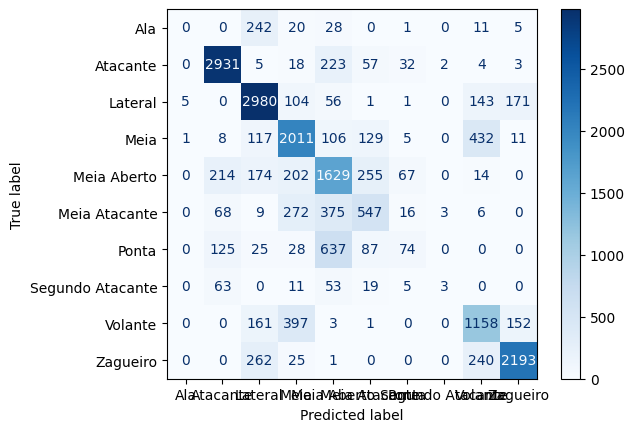

In [12]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

init_mlflow(ip, port, 'First: DecisionTreeClassifier')


decision_tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()
best_decision_tree = params_grid_search(decision_tree, decision_tree_params, X_train, y_train, scores)
log_model(best_decision_tree, 'DecisionTree', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_dt = best_decision_tree.predict(X_test)

print(f'Test Accuracy for Decision Tree: {best_decision_tree.score(X_test, y_test)}')
print(f'Classification report for Decision Tree:\n{classification_report(y_test, y_test_pred_dt)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Random Forest Classifier

Esse foi o algoritmo que teve o maior tempo de execução, superando uma hora de execução, um total de 74 minutos, porém tivemos bons resultados, com uma precisão de aproximadamennte de 80%

Mesmo tendo uma acurácia maior do que o do modelo anterior, o modelo teve os mesmos erros do Decision Tree, mostrando que o problema é bem difícil  de ser calssificado de forma precisa

Sobre os hiperparâmetros testados, vimos que a profundidade máxima de 30 e o número mínimos de unidades para separar de 2, de forma bem semelhantes ao Decision Tree. A imagem abaixo mostra melhor os parâmetros de forma mais detalhada:


![](images/rf.jpg)

2024/07/09 18:38:50 INFO mlflow.tracking.fluent: Experiment with name 'First: RandomForestClassifier' does not exist. Creating a new experiment.


Training RandomForestClassifier(max_depth=30, n_estimators=150)...


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.7960590626125431


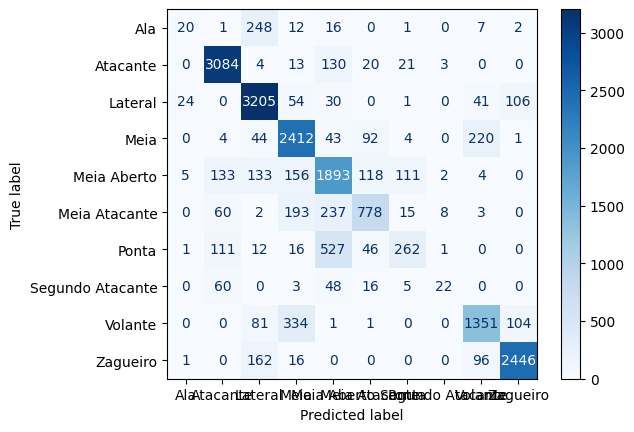

In [16]:
# Bloco 5.2: Treinar e avaliar Random Forest

from sklearn.ensemble import RandomForestClassifier

init_mlflow(ip, port, 'First: RandomForestClassifier')
# Treinar Random Forest

random_forest_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}
random_forest = RandomForestClassifier()
best_random_forest = params_grid_search(random_forest, random_forest_params, X_train, y_train, scores)
log_model(best_random_forest, 'RandomForest', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_rf = best_random_forest.predict(X_test)
print(f'Test Accuracy for Decision Tree: {best_random_forest.score(X_test, y_test)}')
#print(f'Classification report for Random Forest:\n{classification_report(y_test, y_test_pred_rf)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


### KNN Classifier

Esse allgoritmo tee  m desempeo inemediário ao analisar os algoitmos anteriores, possuindo uma acurácia póxima a média das duas, e com um tempo de duração um pouco menor do que o Random Forest, 54 minutos.

Os erros foram bem similares aos erros dos outros modelos.

Sobre os hiperparâmetros testados, vimos que o número inicial de vizios é de 7, e qu o leaf_size é de 30.

A imagem abaixo mostra melhor os parâmetros de forma mais detalhada:


![](images/knn.jpg)

2024/07/09 19:54:17 INFO mlflow.tracking.fluent: Experiment with name 'First: KNeighborsClassifier' does not exist. Creating a new experiment.


Training KNeighborsClassifier(n_neighbors=7, weights='distance')...


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.7659618253845758


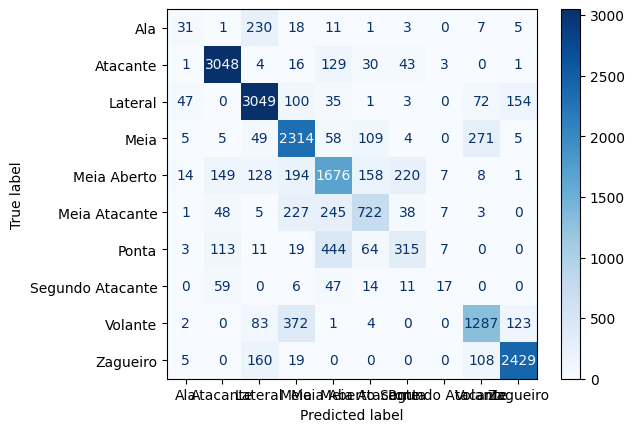

In [17]:
# Bloco 5.3: Treinar e avaliar K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

init_mlflow(ip, port, 'First: KNeighborsClassifier')

# Treinar KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()
best_knn = params_grid_search(knn, knn_params, X_train, y_train, scores)
log_model(best_knn, 'KNN', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_knn = best_knn.predict(X_test)
print(f'Test Accuracy for Decision Tree: {best_knn.score(X_test, y_test)}')
#print(f'Classification report for KNN:\n{classification_report(y_test, y_test_pred_knn)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


### CatBoost Classifier

Esse foi o melhor modelos que tivemos, conseguindo uma acrácia de 80%, bem próximo ao Randon Forest que teve o melhor desempenho, e o tempo de execução foi de aproximadammnte 37 minutos, ou seja meos da metade do tempo de execução e desempeho próximo.

Os erros foram bem similares aos erros dos outros modelos.

Sobre os hiperparâmetros testados, temos uma profundidade de 8, 300 interaçoes e um learning rate de 0.5.

A imagem abaixo mostra melhor os parâmetros de forma mais detalhada:


![](images/catboost1.jpg)

2024/07/09 20:51:50 INFO mlflow.tracking.fluent: Experiment with name 'First: CatBoostClassifier' does not exist. Creating a new experiment.


0:	learn: 2.2723979	total: 171ms	remaining: 16.9s
1:	learn: 2.2444760	total: 203ms	remaining: 9.93s
2:	learn: 2.2171995	total: 232ms	remaining: 7.5s
3:	learn: 2.1923596	total: 261ms	remaining: 6.26s
4:	learn: 2.1687375	total: 291ms	remaining: 5.52s
5:	learn: 2.1456762	total: 321ms	remaining: 5.02s
6:	learn: 2.1233268	total: 351ms	remaining: 4.67s
7:	learn: 2.1022278	total: 381ms	remaining: 4.38s
8:	learn: 2.0821006	total: 415ms	remaining: 4.2s
9:	learn: 2.0623426	total: 446ms	remaining: 4.01s
10:	learn: 2.0435321	total: 478ms	remaining: 3.87s
11:	learn: 2.0255256	total: 511ms	remaining: 3.74s
12:	learn: 2.0080711	total: 549ms	remaining: 3.67s
13:	learn: 1.9913584	total: 597ms	remaining: 3.67s
14:	learn: 1.9747300	total: 632ms	remaining: 3.58s
15:	learn: 1.9582868	total: 669ms	remaining: 3.51s
16:	learn: 1.9428767	total: 700ms	remaining: 3.42s
17:	learn: 1.9277176	total: 732ms	remaining: 3.34s
18:	learn: 1.9138735	total: 767ms	remaining: 3.27s
19:	learn: 1.8997828	total: 799ms	remaining

c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.7919946493800484


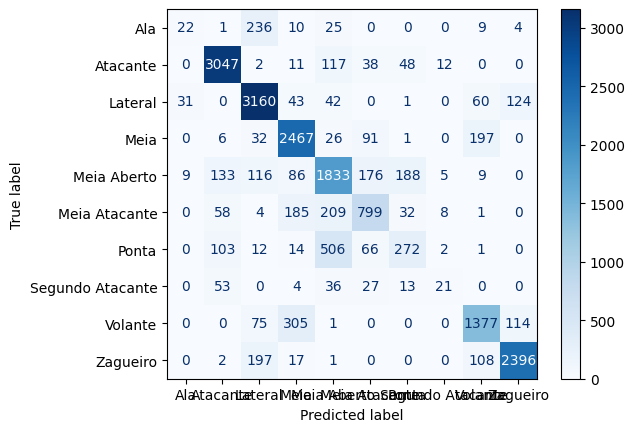

In [18]:
from catboost import CatBoostClassifier

init_mlflow(ip, port, 'First: CatBoostClassifier')

# Treinar CatBoost
catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8]
}

catboost = CatBoostClassifier()
best_catboost = params_grid_search(catboost, catboost_params, X_train, y_train, scores)
log_model(best_catboost, 'CatBoost', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_catboost = best_catboost.predict(X_test)
print(f'Test Accuracy for Decision Tree: {best_catboost.score(X_test, y_test)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_catboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_catboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


#### Melhorias no CatBoost

Fizemos umas alterações no modelo aumentando alguns atributos, porém tivemos um tempo maior e um resultado bem semelhante, no qual o número de inreações foi um parâmetro novo (400). Porém sua execução demorou 20 minutos a mais paraser executado.


0:	learn: 2.2656532	total: 28ms	remaining: 5.58s
1:	learn: 2.2306076	total: 54.6ms	remaining: 5.4s
2:	learn: 2.1976606	total: 79.5ms	remaining: 5.22s
3:	learn: 2.1669502	total: 102ms	remaining: 5s
4:	learn: 2.1374731	total: 125ms	remaining: 4.87s
5:	learn: 2.1095193	total: 153ms	remaining: 4.93s
6:	learn: 2.0828558	total: 176ms	remaining: 4.86s
7:	learn: 2.0571732	total: 200ms	remaining: 4.79s
8:	learn: 2.0326465	total: 222ms	remaining: 4.71s
9:	learn: 2.0091773	total: 248ms	remaining: 4.71s
10:	learn: 1.9868223	total: 271ms	remaining: 4.65s
11:	learn: 1.9652802	total: 296ms	remaining: 4.63s
12:	learn: 1.9445625	total: 320ms	remaining: 4.6s
13:	learn: 1.9242896	total: 343ms	remaining: 4.56s
14:	learn: 1.9048171	total: 367ms	remaining: 4.53s
15:	learn: 1.8860637	total: 390ms	remaining: 4.48s
16:	learn: 1.8678854	total: 411ms	remaining: 4.43s
17:	learn: 1.8502143	total: 434ms	remaining: 4.38s
18:	learn: 1.8327369	total: 454ms	remaining: 4.33s
19:	learn: 1.8161000	total: 479ms	remaining: 

c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.8047538200339559


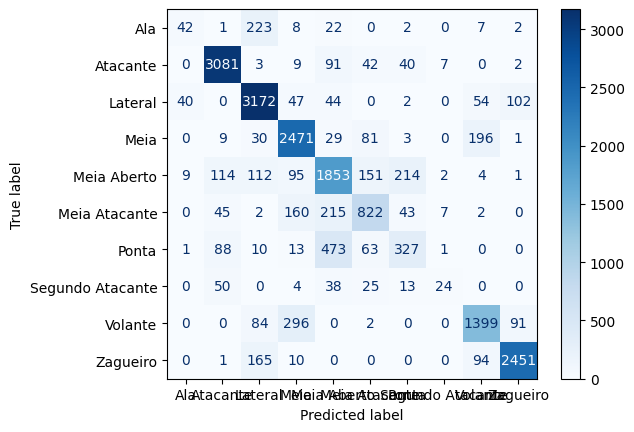

In [10]:
init_mlflow(ip, port, 'First: CatBoostClassifier')

# Treinar CatBoost
catboost_params = {
    'iterations': [200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [8, 10, 12],
    'task_type': ['GPU']
}

catboost = CatBoostClassifier()
best_catboost = params_grid_search(catboost, catboost_params, X_train, y_train, scores)
log_model(best_catboost, 'CatBoost', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_catboost = best_catboost.predict(X_test)
print(f'Test Accuracy for Decision Tree: {best_catboost.score(X_test, y_test)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_catboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_catboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Passo 6: Algoritmo de Auto-Aprendizado
Utilizamos ao invés do auto-sklearn, que é exclusivo para linux, utilizamos o mljar.

Com ele tivemos o melhor resultado e uma visão geral de outros algoritmos que foram testamdo quando foi feita uma busca do melhor modelo. Todo o tempo de execução foi abaixo dos 5 minutos, com aprecisão similarao Catboost

In [ ]:
!pip install mljar-supervised

In [9]:
from supervised.automl import AutoML

automl = AutoML(
    total_time_limit=5*60, 
    mode='Explain', 
    ml_task='multiclass_classification'
)

automl.fit(X_train, y_train)

automl_predict = automl.predict(X_test)

print(f'Test Accuracy for AutoML: {accuracy_score(y_test, automl_predict)}')

automl.report()

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 2.089062 trained in 1.74 seconds


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight


2_DecisionTree logloss 1.334413 trained in 9.62 seconds
* Step default_algorithms will try to check up to 3 models


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum t

3_Default_Xgboost logloss 0.563404 trained in 157.15 seconds


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.


4_Default_NeuralNetwork logloss 0.66933 trained in 28.21 seconds


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


5_Default_RandomForest logloss 1.146261 trained in 24.27 seconds
* Step ensemble will try to check up to 1 model


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill 

Ensemble logloss 0.546732 trained in 1.77 seconds
AutoML fit time: 232.96 seconds
AutoML best model: Ensemble
Test Accuracy for AutoML: 0.8042393373462983


## Passo 7: Conclusão

Notamos, então, que nosso modelo não consegue fazer predições em relação a posição de jogadores que atuam em áreas semelhantes do campo, visto que muitos jogadores podem ter valências semelhantes mesmo jogando em funções distintas, por exemplo Volantes que geralmente possuem um atributo de defesa muito significativo, porém é mais comum Zagueiros serem bons defensores, isso gera dúvidas ao modelo. 

Ademais, no feature importance reportado pelo AutoML foi notável que atributos específicos são mais decisivos que atributos gerais, como físico e velocidade. 

Falando sobre os modelos, o melhor, definitivamente, foi o ensemble gerado pelo AutoML da lib AutoMLJAR, que teve um tempo de execução muito baixo, com resultados muito próximos do catboost melhorado, 0.81 de acurácia, sendo que o segundo demorou 57 minutos para finalizar sua execução